# Custom model

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
dir_loc = "../data/"
ans_dir_loc = "../data/ans/"
model_loc = "../model/"

In [3]:
image_train_lv0 = dir_loc + "train/level0/"
image_train_lv1 = dir_loc + "train/level1/"
image_train_lv2 = dir_loc + "train/level2/"

In [4]:
def read_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_array = np.array(image)
    image_array = image_array / 255.0
    return image_array

def read_image_gray(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_array = np.array(image)
    image_array = image_array / 255.0
    return image_array

(224, 224)
[[0.68235294 0.67058824 0.65098039 ... 0.89803922 0.89803922 0.89803922]
 [0.69411765 0.66666667 0.64705882 ... 0.89803922 0.89803922 0.89803922]
 [0.67843137 0.65098039 0.62745098 ... 0.89803922 0.89803922 0.89803922]
 ...
 [0.61568627 0.61176471 0.58039216 ... 0.55294118 0.59215686 0.61960784]
 [0.61176471 0.60392157 0.50588235 ... 0.3254902  0.51372549 0.56470588]
 [0.60784314 0.56470588 0.5254902  ... 0.34901961 0.3254902  0.47843137]]


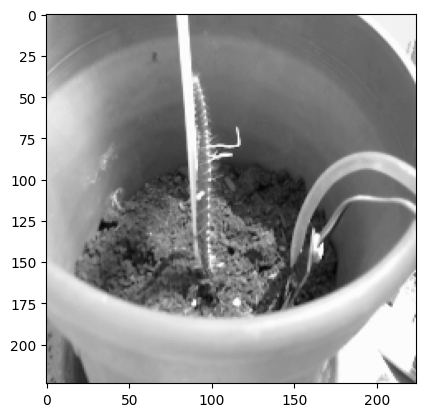

In [5]:
sample_data = "../data/train/level0/Level1_2021-9-26@16_59_00.jpg"
sample_image = cv2.imread(sample_data)
# plt.imshow(sample_image)

#to gray scale
gray_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (224, 224))
plt.imshow(gray_image, cmap='gray')
gray_image_array = np.array(gray_image)
gray_image_array = gray_image_array / 255.0
print(gray_image_array.shape)
print(gray_image_array)

In [6]:
image_train_lv0_images_names = os.listdir(image_train_lv0)
image_train_lv1_images_names = os.listdir(image_train_lv1)
image_train_lv2_images_names = os.listdir(image_train_lv2)

image_train_lv0_images = [read_image(image_train_lv0 + image_train_lv0_images_names[i]) for i in range(len(image_train_lv0_images_names))]
print("image_train_lv0_images: ", len(image_train_lv0_images))
image_train_lv1_images = [read_image(image_train_lv1 + image_train_lv1_images_names[i]) for i in range(len(image_train_lv1_images_names))]
print("image_train_lv1_images: ", len(image_train_lv1_images))
image_train_lv2_images = [read_image(image_train_lv2 + image_train_lv2_images_names[i]) for i in range(len(image_train_lv2_images_names))]
print("image_train_lv2_images: ", len(image_train_lv2_images))

image_train_lv0_images_gray = [read_image_gray(image_train_lv0 + image_train_lv0_images_names[i]) for i in range(len(image_train_lv0_images_names))]
print("image_train_lv0_images_gray: ", len(image_train_lv0_images_gray))
image_train_lv1_images_gray = [read_image_gray(image_train_lv1 + image_train_lv1_images_names[i]) for i in range(len(image_train_lv1_images_names))]
print("image_train_lv1_images_gray: ", len(image_train_lv1_images_gray))
image_train_lv2_images_gray = [read_image_gray(image_train_lv2 + image_train_lv2_images_names[i]) for i in range(len(image_train_lv2_images_names))]
print("image_train_lv2_images_gray: ", len(image_train_lv2_images_gray))

image_train_lv0_images:  30
image_train_lv1_images:  44
image_train_lv2_images:  22
image_train_lv0_images_gray:  30
image_train_lv1_images_gray:  44
image_train_lv2_images_gray:  22


In [7]:
normal_train_images = list()
normal_train_images.extend(image_train_lv0_images)
normal_train_images.extend(image_train_lv1_images)
normal_train_images.extend(image_train_lv2_images)

#add ans
normal_train_ans = list()
normal_train_ans.extend([0 for i in range(len(image_train_lv0_images))])
normal_train_ans.extend([1 for i in range(len(image_train_lv1_images))])
normal_train_ans.extend([2 for i in range(len(image_train_lv2_images))])

#add gray
normal_train_images_gray = list()
normal_train_images_gray.extend(image_train_lv0_images_gray)
normal_train_images_gray.extend(image_train_lv1_images_gray)
normal_train_images_gray.extend(image_train_lv2_images_gray)


print("normal_train_images: ", len(normal_train_images))
print("normal_train_images[0]: ", normal_train_images[0].shape)
print("normal_train_ans: ", len(normal_train_ans))
print("normal_train_ans[0]: ", normal_train_ans[0])
print("normal_train_images_gray: ", len(normal_train_images_gray))
print("normal_train_images_gray[0]: ", normal_train_images_gray[0].shape)

normal_train_images:  96
normal_train_images[0]:  (480, 640, 3)
normal_train_ans:  96
normal_train_ans[0]:  0
normal_train_images_gray:  96
normal_train_images_gray[0]:  (480, 640)


In [8]:
normal_X_train = np.array(normal_train_images)
normal_y_train = np.array(normal_train_ans)
normal_X_train_gray = np.array(normal_train_images_gray)

print("normal_X_train: ", normal_X_train.shape)
print("normal_X_train_gray: ", normal_X_train_gray.shape)
print("normal_y_train: ", normal_y_train.shape)

normal_X_train:  (96, 480, 640, 3)
normal_X_train_gray:  (96, 480, 640)
normal_y_train:  (96,)


In [9]:
#shuffle
import tensorflow_datasets as tfds
from sklearn.utils import shuffle

normal_X_train, normal_y_train = shuffle(normal_X_train, normal_y_train, random_state=0)
normal_X_train_gray, normal_y_train = shuffle(normal_X_train_gray, normal_y_train, random_state=0)

print("normal_X_train: ", normal_X_train.shape)
print("normal_X_train_gray: ", normal_X_train_gray.shape)   
print("normal_y_train: ", normal_y_train.shape)

c:\Program Files\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


normal_X_train:  (96, 480, 640, 3)
normal_X_train_gray:  (96, 480, 640)
normal_y_train:  (96,)


## Model

In [10]:
#Gray Scale model
#input size = 480*640
#class = 3

#model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_gray = Sequential()
model_gray.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(480, 640, 1)))
model_gray.add(MaxPooling2D(pool_size=(2, 2)))
model_gray.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_gray.add(MaxPooling2D(pool_size=(2, 2)))
model_gray.add(Flatten())
model_gray.add(Dense(64, activation='relu'))
model_gray.add(Dense(32, activation='relu'))
model_gray.add(Dense(3, activation='softmax'))

model_gray.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 478, 638, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 239, 319, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1193216)           0         
                                                                 
 dense (Dense)               (None, 64)                7

In [11]:
model_gray.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.05), metrics=['accuracy'])

In [12]:
#train
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1) #this will terminate training when val_loss stops improving for 10 epochs.
model_checkpoint = ModelCheckpoint('model_gray.h5', monitor='val_loss', verbose=1, save_best_only=True)

history_gray = model_gray.fit(normal_X_train_gray, normal_y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 31876.6875 - accuracy: 0.4211
Epoch 1: val_loss improved from inf to 136.30432, saving model to model_gray.h5
3/3 [==============================] - 8s 3s/step - loss: 31876.6875 - accuracy: 0.4211 - val_loss: 136.3043 - val_accuracy: 0.4500
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 2288.2859 - accuracy: 0.3289
Epoch 2: val_loss did not improve from 136.30432
3/3 [==============================] - 6s 2s/step - loss: 2288.2859 - accuracy: 0.3289 - val_loss: 2291.7437 - val_accuracy: 0.1000
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 861.6849 - accuracy: 0.2895 
Epoch 3: val_loss improved from 136.30432 to 1.04033, saving model to model_gray.h5
3/3 [==============================] - 7s 2s/step - loss: 861.6849 - accuracy: 0.2895 - val_loss: 1.0403 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 6.2538 - accuracy: 0.3816
Epoch 4: val_

## RGB model

In [13]:
model_rgb = Sequential()
model_rgb.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(480, 640, 3)))
model_rgb.add(MaxPooling2D(pool_size=(2, 2)))
model_rgb.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_rgb.add(MaxPooling2D(pool_size=(2, 2)))
model_rgb.add(Flatten())
model_rgb.add(Dense(64, activation='relu'))
model_rgb.add(Dense(32, activation='relu'))
model_rgb.add(Dense(3, activation='softmax'))

model_rgb.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 478, 638, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 239, 319, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 237, 317, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 118, 158, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1193216)           0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [14]:
model_rgb.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.05), metrics=['accuracy'])

In [15]:
#train
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('model_rgb.h5', monitor='val_loss', verbose=1, save_best_only=True)

history_rgb = model_rgb.fit(normal_X_train, normal_y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
3/3 [==============================] - ETA: 0s - loss: 27428.0488 - accuracy: 0.3553
Epoch 1: val_loss improved from inf to 3707.23120, saving model to model_rgb.h5
3/3 [==============================] - 9s 3s/step - loss: 27428.0488 - accuracy: 0.3553 - val_loss: 3707.2312 - val_accuracy: 0.3500
Epoch 2/100
3/3 [==============================] - ETA: 0s - loss: 1897.2900 - accuracy: 0.2500
Epoch 2: val_loss improved from 3707.23120 to 37.19601, saving model to model_rgb.h5
3/3 [==============================] - 8s 3s/step - loss: 1897.2900 - accuracy: 0.2500 - val_loss: 37.1960 - val_accuracy: 0.5500
Epoch 3/100
3/3 [==============================] - ETA: 0s - loss: 17.5647 - accuracy: 0.3026
Epoch 3: val_loss improved from 37.19601 to 1.13159, saving model to model_rgb.h5
3/3 [==============================] - 8s 3s/step - loss: 17.5647 - accuracy: 0.3026 - val_loss: 1.1316 - val_accuracy: 0.1000
Epoch 4/100
3/3 [==============================] - ETA: 0s - loss: 1.1044 - 

In [21]:
#predict

#test
test_image_loc = "../data/testPlant_B_0~1/level0/Level1_2021-9-26@17_59_00.jpg"
test_image = read_image(test_image_loc)
ans = 1
print("test_image: ", test_image.shape)
test_image_gray = read_image_gray(test_image_loc)
print("test_image_gray: ", test_image_gray.shape)

test_image = np.expand_dims(test_image, axis=0)
test_image_gray = np.expand_dims(test_image_gray, axis=0)

print("test_image: ", test_image.shape)
print("test_image_gray: ", test_image_gray.shape)

pred = model_rgb.predict(test_image)
print("pred: ", pred)
print("pred: ", np.argmax(pred))

pred = model_gray.predict(test_image_gray)
print("pred: ", pred)
print("pred: ", np.argmax(pred))


test_image:  (480, 640, 3)
test_image_gray:  (480, 640)
test_image:  (1, 480, 640, 3)
test_image_gray:  (1, 480, 640)
1/1 [==============================] - 0s 58ms/step
pred:  [[0.31135324 0.43534884 0.2532979 ]]
pred:  1
1/1 [==============================] - 0s 62ms/step
pred:  [[0.27988467 0.43378666 0.28632873]]
pred:  1


## Using Googlenet

In [16]:
#import googlenet
from keras.applications.inception_v3 import InceptionV3
from keras.layers import Input, Dense, Dropout, Flatten, Activation, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

input_tensor = Input(shape=(480, 640, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)

predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.summary()

87910968/87910968 [==============================] - 9s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 480, 640, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 239, 319, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 239, 319, 32  96         ['conv2d_4[0][0]']               
 alization)                  

In [17]:
#train
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint('model_googlenet.h5', monitor='val_loss', verbose=1, save_best_only=True)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.05), metrics=['accuracy'])

In [18]:
#train
history = model.fit(normal_X_train, normal_y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stopping, model_checkpoint])

Epoch 1/100


KeyboardInterrupt: 

In [ ]:
#show history
import matplotlib.pyplot as plt

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(history_gray, 'accuracy', 'val_accuracy')